In [1]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

, there is a cell in the homework for this week that says NOTE: The code for this step is provided for you but the code is missing... Here is that code if you end up needing it!

# Creating a DataFrame with the PCA data
# Note: The code for this step is provided for you

market_data_pca_df = pd.DataFrame(
    market_pca_data, 
    columns=["PCA1", "PCA2", "PCA3"]

In [3]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
display(market_data_df.head(10))
display(market_data_df.info())

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, bitcoin to digibyte
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price_change_percentage_24h   41 non-null     float64
 1   price_change_percentage_7d    41 non-null     float64
 2   price_change_percentage_14d   41 non-null     float64
 3   price_change_percentage_30d   41 non-null     float64
 4   price_change_percentage_60d   41 non-null     float64
 5   price_change_percentage_200d  41 non-null     float64
 6   price_change_percentage_1y    41 non-null     float64
dtypes: float64(7)
memory usage: 2.6+ KB


None

In [4]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaled_data_arr = StandardScaler().fit_transform(market_data_df)
display(scaled_data_arr[:5])

array([[ 0.50852937,  0.49319307,  0.77220043,  0.23545963, -0.0674951 ,
        -0.35595348, -0.25163688],
       [ 0.18544589,  0.93444504,  0.55869212, -0.05434093, -0.27348273,
        -0.11575947, -0.19935211],
       [ 0.02177396, -0.70633685, -0.02168042, -0.06103015,  0.00800452,
        -0.55024692, -0.28206051],
       [-0.04076438, -0.81092807,  0.24945797, -0.05038797, -0.37316402,
        -0.45825882, -0.29554614],
       [ 1.19303608,  2.00095907,  1.76061001,  0.54584206, -0.29120287,
        -0.49984776, -0.27031695]])

In [8]:
market_data_df.columns

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')

In [12]:
# Create a DataFrame with the scaled data
# Copy the crypto names from the original data
# Set the coinid column as index

scaled_market_data_df = pd.DataFrame(scaled_data_arr, 
    index = market_data_df.index,
    columns=
    ['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'], 
       )
# Display sample data
scaled_market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


### Find the Best Value for k Using the Scaled DataFrame.

In [13]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11, Create an empty list to store the inertia values
k = list(range(1,11))
inertia= []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, random_state=3)
    k_model.fit(scaled_market_data_df)
    inertia.append(k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k, 'inertia': inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_data_df = pd.DataFrame(elbow_data)

# Display the DataFrame
display(elbow_data_df)

c:\Users\black\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\black\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\black\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\black\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

,k,inertia
0,1,287.000000
1,2,235.816943
2,3,170.193571
3,4,79.022435
4,5,69.668772
5,6,58.003651
6,7,45.981797
7,8,37.078233
8,9,33.313721
9,10,29.531038


<Axes: title={'center': 'K vs. Inertia for Stock Data'}, xlabel='k'>

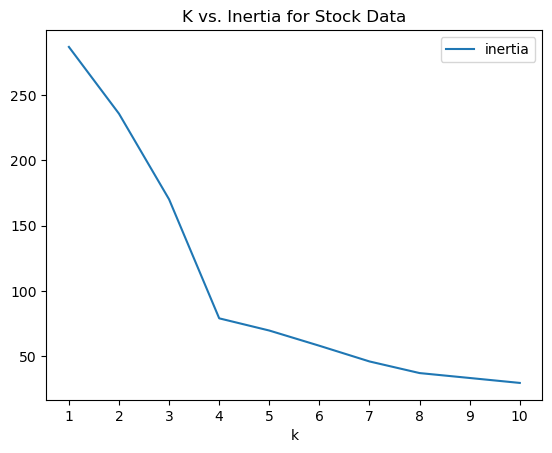

In [14]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_data_df.plot(title='K vs. Inertia for Stock Data', x='k', xticks=k, y='inertia')

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:**  k=4 shows the largest change in slope, where rate of change alters
quite drastically.

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [15]:
# Initialize the K-Means model using the best value for k
k_model = KMeans(n_clusters=4, random_state=3)

In [16]:
# Fit the K-Means model using the scaled data
k_model.fit(scaled_market_data_df)

c:\Users\black\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=3)

In [19]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_predictions_arr = k_model.predict(scaled_market_data_df)

# View the resulting array of cluster values.
display(cluster_predictions_arr[:10])

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0])

In [20]:
# Create a copy of the DataFrame
market_data_predictions_df = scaled_market_data_df.copy()

In [27]:
# Add a new column to the DataFrame with the predicted clusters
market_data_predictions_df['predicted_clusters'] = cluster_predictions_arr

# Display sample data
display(market_data_predictions_df['predicted_clusters'].value_counts())
display(market_data_predictions_df.head())

predicted_clusters
0    26
1    13
3     1
2     1
Name: count, dtype: int64

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,predicted clusters,predicted_clusters
coin_id,,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,1,1
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,1,1
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,1,1


<Axes: title={'center': 'price change percent 24h vs. 7days '}, xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

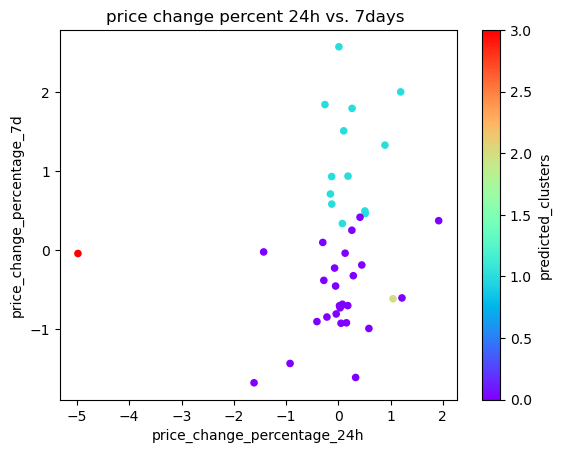

In [23]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.

market_data_predictions_df.plot.scatter(title='price change percent 24h vs. 7days ',
                                        x='price_change_percentage_24h',
                                        y='price_change_percentage_7d',
                                        c='predicted_clusters',
                                        colormap='rainbow')


### Optimize Clusters with Principal Component Analysis.

In [29]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [31]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
crypto_pca_arr = pca.fit_transform(scaled_market_data_df)

# View the first five rows of the ARRAY. 
crypto_pca_arr[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [33]:
# Retrieve the explained variance to determine how much information can be attributed to each principal component.
display(pca.explained_variance_ratio_)
display(sum(pca.explained_variance_ratio_))

array([0.3719856 , 0.34700813, 0.17603793])

0.8950316570309841

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:**  The total Explained Variance of the 3 principal components is 89.5%.

In [35]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you
# Copy the crypto names from the original data
# Set the coinid column as index

# crypto_pca_df
market_data_pca_df = pd.DataFrame(crypto_pca_arr, 
                    index=market_data_predictions_df.index,
                    columns=["PCA1", "PCA2", "PCA3"])

# Display sample data
display(market_data_pca_df.head(10))

# # ----------------------------------------------??
# market_data_pca_df = pd.DataFrame(
#     market_pca_data, 
#     columns=["PCA1", "PCA2", "PCA3"]
# # ----------------------------------------------??

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


### Find the Best Value for k Using the PCA Data

In [37]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1,11))
# Create an empty list to store the inertia values
intertia= []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list

for i in k:
    k_model = KMeans(n_clusters=i, random_state=3)
    k_model.fit(market_data_pca_df)
    intertia.append(k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
pca_elbow_data = {'k':k , 'inertia': inertia}

# Create a DataFrame with the data to plot the Elbow curve
pca_elbow_df = pd.DataFrame(pca_elbow_data)

# Display the DataFrame
display(pca_elbow_df)

c:\Users\black\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\black\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\black\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\black\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

,k,inertia
0,1,287.000000
1,2,235.816943
2,3,170.193571
3,4,79.022435
4,5,69.668772
5,6,58.003651
6,7,45.981797
7,8,37.078233
8,9,33.313721
9,10,29.531038


<Axes: title={'center': 'k vs. inertia for PCA Data for Crypto'}, xlabel='k'>

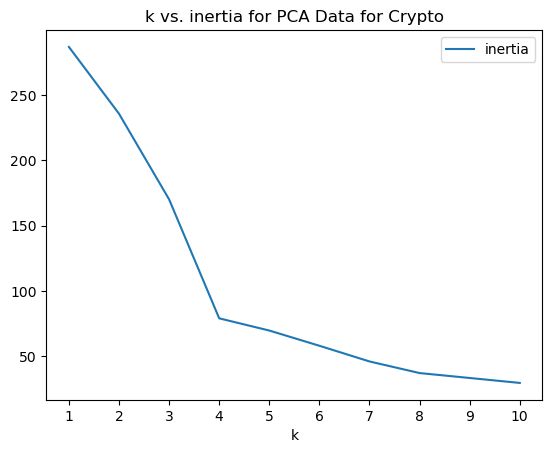

In [40]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

pca_elbow_df.plot(title='k vs. inertia for PCA Data for Crypto',
                  x='k', xticks=k,
                  y='inertia')

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** k=4 appears to be the best/optimal value.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No, it is the same value.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [41]:
# Initialize the K-Means model using the best value for k
pca_k_model = KMeans(n_clusters=4, random_state=3)

In [42]:
# Fit the K-Means model using the PCA data
pca_k_model.fit(market_data_pca_df)

c:\Users\black\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=3)

In [45]:
# Predict the clusters to group the cryptocurrencies using the PCA data
pca_predict_arr = pca_k_model.predict(market_data_pca_df)

# Print the resulting array of cluster values.
display(pca_predict_arr)

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 1, 0, 0, 2, 0, 0, 0, 0])

In [46]:
# Create a copy of the DataFrame with the PCA data
market_data_pca_predict_df = market_data_pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
market_data_pca_predict_df['predicted_clusters'] = pca_predict_arr

# Display sample data
display(market_data_pca_predict_df.head())

,PCA1,PCA2,PCA3,predicted_clusters
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,1
ethereum,-0.458261,0.458466,0.952877,1
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,1


<Axes: title={'center': 'Cryptocurrency Data: PCA1 vs. PCA2, predicted clusters'}, xlabel='PCA1', ylabel='PCA2'>

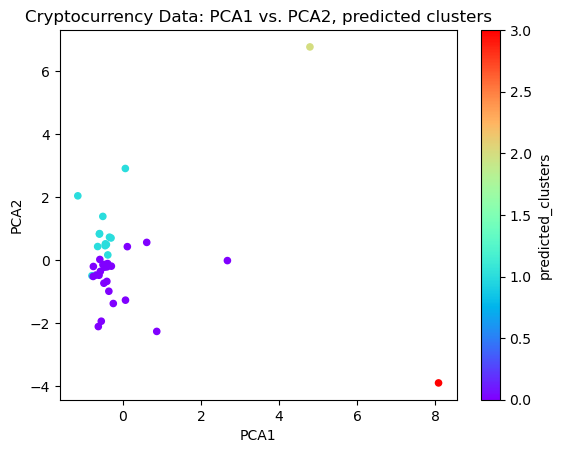

In [47]:
# Create a scatter plot by setting `x="PCA1"` and `y="PCA2"`. 
market_data_pca_predict_df.plot.scatter(
    title='Cryptocurrency Data: PCA1 vs. PCA2, predicted clusters',
    x='PCA1',
    y='PCA2',
    c='predicted_clusters',
    colormap='rainbow')

### Determine the Weights of Each Feature on each Principal Component

In [48]:
# quick review of columns from scaled_market_data_df
display(scaled_market_data_df.head())
display(scaled_market_data_df.columns)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')

In [51]:
# Use the columns from the original scaled DataFrame as the index.
pca_comp_weights = pd.DataFrame(pca.components_.T, 
                                columns=['PCA1', 'PCA2', 'PCA3'],
                                index=scaled_market_data_df.columns)

display(pca_comp_weights.sort_values('PCA1', ascending=False))
display(pca_comp_weights.sort_values('PCA2', ascending=False))
display(pca_comp_weights.sort_values('PCA3', ascending=False))

,PCA1,PCA2,PCA3
price_change_percentage_200d,0.594468,0.027735,0.039733
price_change_percentage_1y,0.568379,-0.150789,0.210541
price_change_percentage_60d,0.320365,0.434040,-0.361377
price_change_percentage_30d,0.191523,0.562182,-0.181744
price_change_percentage_14d,-0.009162,0.540415,0.349534
price_change_percentage_7d,-0.102432,0.227432,0.787670
price_change_percentage_24h,-0.416728,0.358162,-0.218795


,PCA1,PCA2,PCA3
price_change_percentage_30d,0.191523,0.562182,-0.181744
price_change_percentage_14d,-0.009162,0.540415,0.349534
price_change_percentage_60d,0.320365,0.434040,-0.361377
price_change_percentage_24h,-0.416728,0.358162,-0.218795
price_change_percentage_7d,-0.102432,0.227432,0.787670
price_change_percentage_200d,0.594468,0.027735,0.039733
price_change_percentage_1y,0.568379,-0.150789,0.210541


,PCA1,PCA2,PCA3
price_change_percentage_7d,-0.102432,0.227432,0.787670
price_change_percentage_14d,-0.009162,0.540415,0.349534
price_change_percentage_1y,0.568379,-0.150789,0.210541
price_change_percentage_200d,0.594468,0.027735,0.039733
price_change_percentage_30d,0.191523,0.562182,-0.181744
price_change_percentage_24h,-0.416728,0.358162,-0.218795
price_change_percentage_60d,0.320365,0.434040,-0.361377


#### Answer the following question: 

**Question:** Which features have the strongest positive or negative influence on each component? 
 
**Answer:**  
  
**PCA1:** 
 * Features that have the largest impact on  **PCA1** are **price_change_percentage**:
 **_200d (~59%), _1y (~57%), _60d (~32%), _30d (~19%)**

* These are the features that have the longest time peridos, with the two longest
  periods  **(200 day, 1 year) ** having the most significant impacts. 

**PCA2:** 
* Features that have the largest impact on  **PCA2** are **price_change_percentage**:
 **_30d (~56%), _14d (~54%), _60d (~43%), _24h (~35%), _7d (~22%)**.

*  These features representing the shorter of the time periods and have a 
larger number of features that appear to impact  **PCA2 **.

* The longest two periods **(1 year, 200 days) ** have little impact on  **PCA2**.

**PCA3:** 
* Features that have the largest impact on  **PCA3** are **price_change_percentage**:
 **_7d (~78%), _14d (~35%), _1y (~21%)**.

* These features skew towards 1-2 week periods  **(7d, 14d)**, but also include the 1 year.

* The  **7 day** is the single feature with the largest positive influence on the PCA values
at  **78%**.
    